## Building your first AI . . . not quite a Deckart, but still.

So we've learned a bit about how to use Pandas, Numpy, how to import a Python library, and a bit about functions. Now, let's combine these all together to build our very first Deep Neural Network (or DNN for short). This lesson WON'T require us to build a dictionary of any-sort--I'll touch on that more in a follow up lesson on how to build an LSTM network for NLP processes later. But for now, let's get to work on using the numerical data from our df_data sheet to see if we can predict if a person makes more than or less than 50K a year (surprise! Our data was US Census data the whole time!). To do this, let's look at our columns again, just for reference:

##### COLUMNS = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "gender", "capital_gain", "capital_loss", "hours_per_week", "native_country", "LABELS"] 


### Basic Neural Network Vocabulary
Before we really dig into the nitty-gritty here, let's talk about some vocabulary. For the sake of your learning outcomes, you need to know these terms:

Training Data: The data that you're going to feed into the network that it can use to learn. Pretty much any kind of data sheet.

Test Data: so there's two kinds of test data, depending on what you're doing--(1) "validation data" which is a small section of data similar to your training data, but not included in the training data set, and (2) [TRUE] test data, which is data that is from, hopefully, a completely different domain in real-life (think: training a network on twitter data, but testing it on transcripts of what people say) than the one that you're using the data for training your network on.

Training Steps: one row in the training data is one training step. That simple.

epochs: the number of times that your network is going to go through all of your training data. If you have 1 epoch, and a training data worksheet of 10,000 rows, then one epoch is 10,000 training steps. For 2 epochs, it's 20,000, and so on.

Batch Size: How many training steps you want the network to go through before it memorizes everything it learned, in lay-man's terms. Technically, it's the number of examples you want the network to train on each time.

Input shape: So what does the first, input layer look like in terms of its numpy dimensions? (see last lesson). If you have a single row of data, with 6 columns, Keras is going to want an numpy array with 3-dimensions, which looks like this:

        input_shape=(batch_size, #_of_rows, #_of_columns)

Hidden Layer: A Neural Network is composed of multiple layers of artificial neurons. Each intermediate layer between the input layer and the output layer, which tells you what the example is, is a HIDDEN LAYER and is composed of as many artificial neurons as you'd like. You can have an infinite number of hidden layers, and an infinite number of neurons in each layer, but good luck trying to train anything if you do that. Stick to 1-3 layers, trust me.

Fully connected hidden layer: If every neuron in the hidden layer is connected to every neuron or input in the layer before it, it's a fully connected layer. In Keras, we can build these easily using the function

    Dense()
    
Training: Exactly what you think it means.

Evaluation: So, now we run the test data and see if the network gets the right label for each item. If this worked right, we should get a percentage getting close to 1 (.98 is a pretty good ACCURACY in many cases).

Weights: So how does the network actually "learn?" The answer is via weights . . . weights are numerical  representations of the connection between neurons. The higher the weights, the more connected the two neurons are.  Think of it as though you're decreasing the distance between neurons, and so neurons that are closer together are more likely to "fire" together than ones that are farther apart. Training a network is in a large part training these weights to be more efficient. It's like they say in neuroscience--neurons that fire together, wire together!

Biases: Biases are oft overlooked, but so important. Weights basically push the outcome of the networks calculations in a particular direction. So let's say that category 3 (out of 4 categories) is really infrequent. Biases basically push the network away from choosing category 3, making the more frequent, and thus more likely, categories more favorable.


### Importing your data
So with that information in mind--let's begin with importing the libraries we'll be using today. The first two are easy.

In [7]:
import pandas as pd
import numpy as np

Of COURSE we're going to start with pandas and numpy! How else are we going to get our data into the network, AND edit it to be the right shape? From here though, we need toimport the python library that we'll be using to BUILD our neural network with, and that will ocme in the form of a particular library called Keras. While Keras technically is just a means of playing with another library, Tensorflow, it's a very simple way to do so that most ML engineers use these days to save on time. We're about to learn another great skill to hold onto for python too--importing small sections of a python library so that we can manageably use them in our own code. This all comes together to look like this:

In [8]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Activation

Never mind the printout--it's just telling you useful information if you want to play around with the code that makes Keras up in the first place. But this right here will set up everything you need to build your first nerual network. Now, let's import our data sheets!

In [9]:
df_train=pd.read_table('./data-sets/adult.data.txt', sep=',', skipinitialspace=True)
df_test=pd.read_table('./data-sets/adult.test.txt', sep=',', skipinitialspace=True)

Why do we need two datasheets now, you ask? Well it's not fair to test the neural network on the data that we use to train it--think of it like this, if it knows all the data already, can't it have just memorized the information? The answer is yes, yes it can, and we're not going to run that risk. So we use what's known as a "Validation set" of data points that look similar to the training data, but that the system has never seen before. This allows us to test our model before giving it a real, field test with data from the outside world.

### Creating Classes for the classifier
So now that we've imported our data, let's create a re-usable variable to represent the number of classes that we'll be putting things into. There are a couple of ways to do this. First off, we could just manually write 2 for that variable. But let's say in the future you want to use this exact same architecture, but apply different data? Well, to do that let's generate the number of classes from the data itself. We can do that with a bit of code that looks like the following:

NOTE: this is usually done in just one line, but I've split it up into multiple in order to annotate what each function is doing.

In [10]:
N_CLASSES=len(                             #We want the length of the list of labels in our data . . . the length should be equal to the number of labels, here.
    set(                                   #Next, we want to make sure that we don't have any repetitions in the data.
        df_train['LABELS'].values.tolist() #And lastly, we're making this set from the list of all the labels in the data.
    )
)


This variable can now be recycled throughout our code whenever we need to reference the number of labels we need to classify things into.

### The network!
And now, let's build our network! So Keras takes care of most of the heavy lifting for us when building a DNN--this is great! And it shorted the code we need to write to only a few, simple lines. This is phenomenal! So let's get cooking.

In [11]:
#Instantiates a model using the Keras Sequential library
model = Sequential()

#And adds to that model a fully connected hidden layer with 20 neurons
model.add(Dense(20))

#And now adds a second fully connected hidden layer to the model
model.add(Dense(100))

I talked a little earlier about what Dense() actually is (a fully connected hidden layer), but I think it's worth going over that again briefly. What this means is that the layer added by Dense() is composed of a set number of neurons, and every neuron is connected to every neuron or data point in the layer before it. To visualize this, here's a picture shamelessly hijacked from Tensorflow:

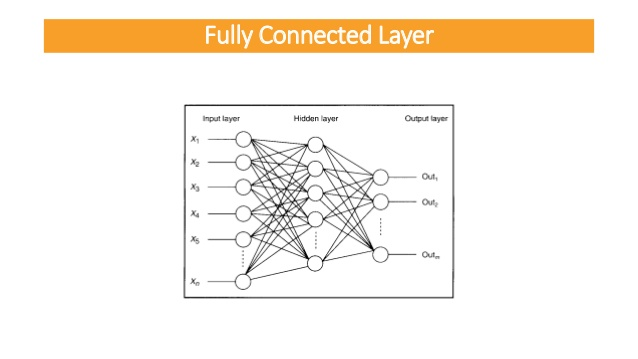

In [2]:
from IPython.display import Image, display
display(Image(filename='./pics/neural-networks-with-google-tensorflow-41-638.jpg', embed=True))

And so, you'll notice that each neuron is connected to every single neuron in the layer before it. Dense creates a new, fully connected hidden layer, every time it's called. It's only job is to build these guys. That's it.

And that's it. That's literally all you need in order to build a DNN in Keras. You can add as many layers as you like, but again, I highly recommend that you stick between 1-3 hidden layers in order to be able to train your model in a reasonable amount of time. To finish building our model, we need to add two more lines of code:

In [12]:
#This is our output layer. It basicaly maps one neuron to each possible 
# category we care about in the data, hence the use of the variable N_CLASSES.
# Even if you skipped creating hidden layers, you NEED to have an output
# layer in order for ANYTHING to work.
model.add(Dense(N_CLASSES, activation='softmax'))

#And now we brew the whole thing together using the compile function.
model.compile('rmsprop', 'categorical_crossentropy')

So you'll notice that there is another parameter added to the output layer--activation. This parameter effectively decides how the neurons will fire. In another lesson, I'll include a discussion of other acitvation functions and how they work, but to date the first two Dense layers are actually sigmoid layers, and this last one--the softmax layer--allows the model to backpropagate, or change, the connections between the layers that proceeded it. Softmax is what makes models train efficiently, as opposed to in the early 1990s when a neural network could take months to years to train.

Meanwhile, in the compile function, we first define what's known as an optimizer--"rmsprop", and secondarily define a loss function, "categorical cross-entropy". This second one is important--the loss function calculates how far off the response generated by the network is to the corect response, which is then used when backpropagating the network. Categorical Cross Entropy is one of many statistical methods that we can use to do this, and effectively looks for how many tiny chunks of information are necessary to define the line between our categories. What it does is effectively find the slope of that line, and then uses that to set where the boundaries between categories should be, by randomly sampling points in the numerical representation of the data and finding their derivative. This verbage effectively looks like this when you visualize it:


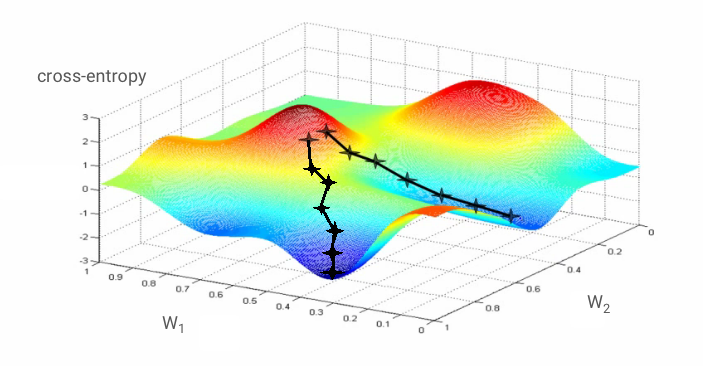

In [13]:
display(Image(filename='./pics/34e9e76c7715b719.png', embed=True))

Where each black X is a random sample made by the computer as it attempts to find where the graphed area slopes downward. All data, when converted to numbers, has a graph and thus a slope, and finding this slope is what cross entropy is made for. Literally.


### Creating an input function and training
And this leads us to our last little module--building a function that takes our data and feeds it into the network. While using all the data including text would take some time and converting everying into a dictionary, we can short cut this and just use th enumerical data provided, to build a model quickly. What our function needs, then, is (1) the data that we're going to be using, (2) a way of defining where int he data sheet we are, so we don't add a hundred data points together, (3) takes in the model we just built so that it can train it with data, and (4) some way of splitting the data point into x-data (or features, which are used to generate a prediction . . . think of how when you see scales and fins, you know you're looking at a fish, but fur and paws means you're looking at a dog), and y-data (labels). So let's define a function that has four inputs--useful columns, the location in the pandas Data Frame we're using, the model we just built, and the data frame itself--and immediately feeds these things into our DNN.

In [14]:
def input_fn(columns, dfk_loc, dnn, dfk):
        #This creates a new dataframe out of the old one, dfk, that 
        # only consists of a single row, at a location we've defined 
        # via dfk_lok
        s=dfk.loc[dfk_loc]
        
        #Here, we create a numpy array for our x-data that consists of 
        # a batch of one, with however many rows that we might want, and 
        # a single column. Why, you ask? Because that's what Keras is 
        # expecting. There is no other reason.
        x_=np.array(
            s[columns].values.tolist()
        ).reshape(1,-1,1)

        #So, remember how we're using categorical cross entropy? Well for
        # that to work, for our y-data we need to create what's known as a
        # 1-hot vector. To do that, we create a list that is as long as we
        # have classes, and just fill it with zeros. That's what the 0 for i
        # in range(N_CLASSES) means--fill the list with as many zeroes as
        # there are classes.
        one_hot=[0 for i in range(N_CLASSES)]
        
        #And in a stroke of genius, now the label in labels, which should
        # be an integer, can represent the index in that list, and we can 
        # use it to replace the zero in the location we care about with a 
        # single 1. Hence, 1-hot. It's a matrix of zeroes, with a single
        # 1 in it representing a category.
        one_hot[s['LABELS']]=1
        
        #And convert that to an array, with dimensions that Keras wants.
        y_=np.array(one_hot).reshape(1, len(one_hot))
        
        #And lastly, use the x and y data to train the model on a single
        # item.
        dnn.train_on_batch(x_, y_)

And now, we put it all together . . . Knowing which columns are numerical already, I've used all the numerical columns below to generate the "features" in my DNN.

In [15]:
#So, I want this to run for ten epochs . . . and tell me what epoch it's on.
for i in range(10):
        print(i, ' EPOCHS HAVE BEEN RUN, MASTER . . .')
        
        #And it'll train by going row by row through the data, and pass
        # that row location, as well as the data we care about from the
        # the data frame, to our input function.
        for loc in range(len(df_train)):
                input_fn(['age', 'fnlwgt','education_num', 'capital_gain', 'capital_loss', 'hours_per_week'], loc, model, df_train)
        

0  EPOCHS HAVE BEEN RUN, MASTER . . .


ValueError: Error when checking target: expected dense_3 to have 3 dimensions, but got array with shape (1, 2)

Wait, what the heck??? What happened? An honest answer lies in the fact that I purposely left out an important part of the model. In Keras, if we want to pass the data through the network, we need to define what the input data looks like. There are two ways to do this--(1), define the dimensions of the input data in the first Dense layer. Or (2) add a new component to the model--Flatten()--which takes all the layers before it and stretches it out into a single layer. I think Flatten() is much easier, and so I'll use that instead. Retooling, my code, it should look like this . . .

In [16]:
model = Sequential()

#The missing link! And we add it here first so that the input is the thing
# that gets flattened.
model.add(Flatten())

model.add(Dense(20))
model.add(Dense(100))
model.add(Dense(N_CLASSES, activation='softmax'))
model.compile('rmsprop', 'categorical_crossentropy')

In [16]:
for i in range(10):
        print(i, ' EPOCHS HAVE BEEN RUN, MASTER . . .')

        for loc in range(len(df_train)):
                input_fn(['age', 'fnlwgt','education_num', 'capital_gain', 'capital_loss', 'hours_per_week'], loc, model, df_train)

0  EPOCHS HAVE BEEN RUN, MASTER . . .
1  EPOCHS HAVE BEEN RUN, MASTER . . .
2  EPOCHS HAVE BEEN RUN, MASTER . . .
3  EPOCHS HAVE BEEN RUN, MASTER . . .
4  EPOCHS HAVE BEEN RUN, MASTER . . .
5  EPOCHS HAVE BEEN RUN, MASTER . . .
6  EPOCHS HAVE BEEN RUN, MASTER . . .
7  EPOCHS HAVE BEEN RUN, MASTER . . .
8  EPOCHS HAVE BEEN RUN, MASTER . . .
9  EPOCHS HAVE BEEN RUN, MASTER . . .


And that's it! Let your model run! Congrats, you're training your first Deep Neural Network! Stay tuned for future classes where we'll talk about other network architectures, like Recurrent Neural Networks. Now, go grab a brew and let your work sort itself out.